# QC predictions from features

In [5]:
import seaborn as sbn
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

project_dir = Path().resolve().parents[1]
results_dir = project_dir / Path("output/QC_prediction_from_features")


## For each site

(125, 7)

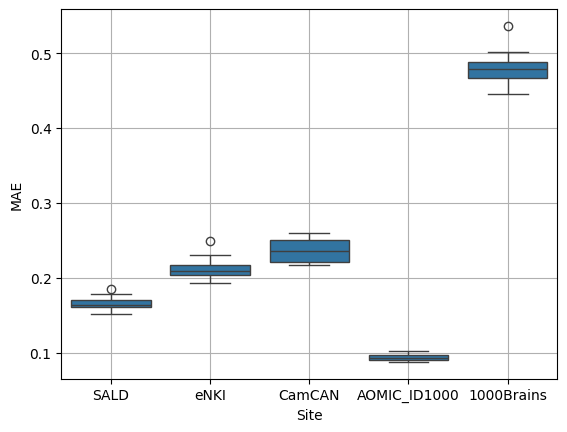

In [8]:
results = pd.read_csv(results_dir / "results_QC_single_site.csv")
results_2_plot = results[results["Model"] == "QC Test"]
sbn.boxplot(data=results_2_plot, x="Site", y="MAE")
plt.grid()
# %%
results_2_plot.shape


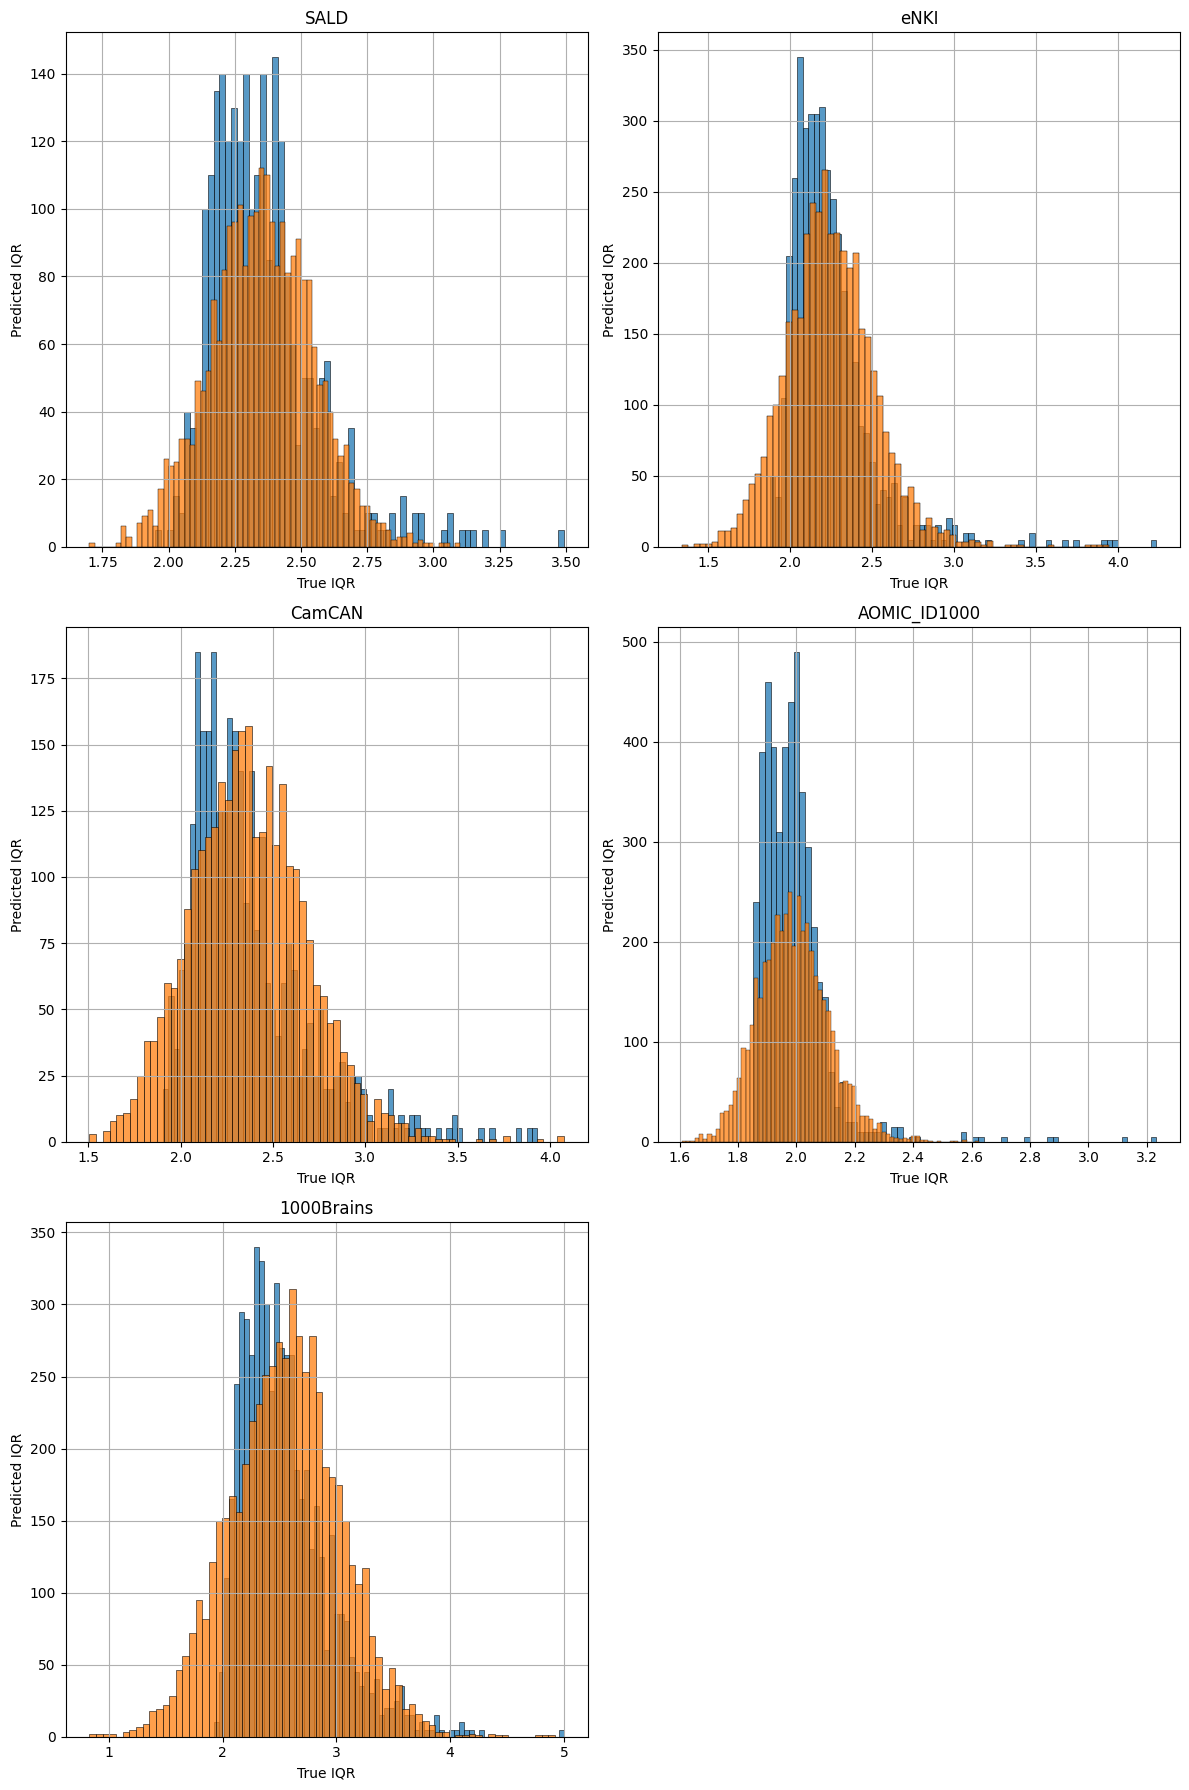

In [10]:
results_single_site = pd.read_csv(results_dir / "results_QC_prediction_single_site.csv")


# %%
# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(3, 2, figure=fig)

# Iterate over sites and create subplots
for idx, site in enumerate(results_single_site["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_single_site[results_single_site["Site"] == site].copy()

    y_max = results_2_plot["y_true"].max()
    y_min = results_2_plot["y_true"].min()
    y_max = max(y_max, results_2_plot["y_pred"].max()) + 0.1
    y_min = min(y_min, results_2_plot["y_pred"].min()) - 0.1

    sbn.histplot(data=results_2_plot, x="y_true", ax=ax, bins=70)
    sbn.histplot(data=results_2_plot, x="y_pred", ax=ax, bins=70)
    # sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    # sbn.kdeplot(
    #     data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    # )
    # ax.set_xlim([y_min, y_max])
    # ax.set_ylim([y_min, y_max])
    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    ax.set_title(site)
    ax.grid()


# Adjust layout
plt.tight_layout()
plt.show()

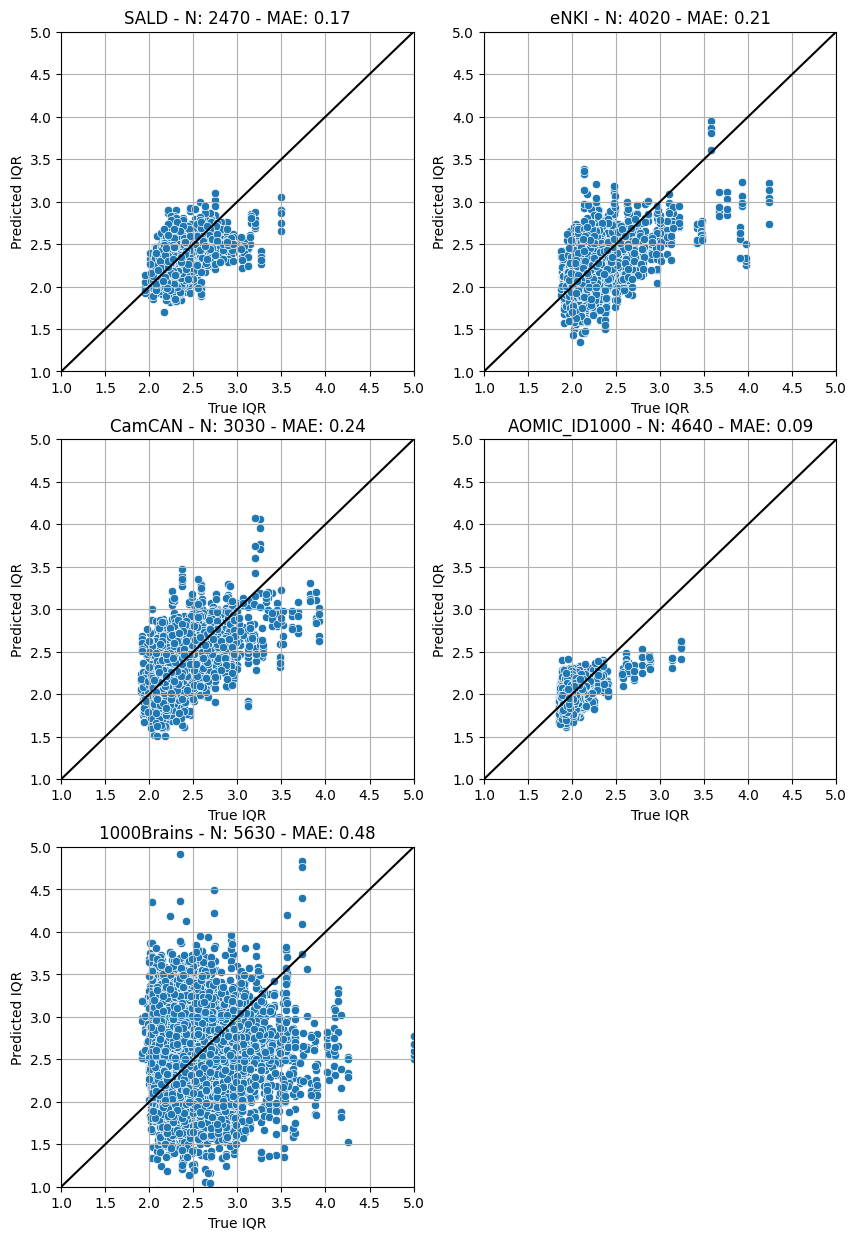

In [11]:

# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(10, 15))
gs = GridSpec(3, 2, figure=fig)
from sklearn.metrics import mean_absolute_error
# Iterate over sites and create subplots
for idx, site in enumerate(results_single_site["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_single_site[results_single_site["Site"] == site]

    y_max = results_2_plot["y_true"].max()
    y_min = results_2_plot["y_true"].min()
    y_max = max(y_max, results_2_plot["y_pred"].max()) + 0.1
    y_min = min(y_min, results_2_plot["y_pred"].min()) - 0.1

    sbn.scatterplot(data=results_2_plot, x="y_true", y="y_pred", ax=ax)
    # sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    # sbn.kdeplot(
    #     data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    # )
    ax.plot([0, 10], [0, 10], color="black")

    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    site_mae = mean_absolute_error(results_2_plot["y_true"],results_2_plot["y_pred"])
    ax.set_title(site + f" - N: {results_2_plot.shape[0]} - MAE: {site_mae:.2f}")
    ax.grid()
    plt.xlim([1,5])
    plt.ylim([1,5])

## Combined data

5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782


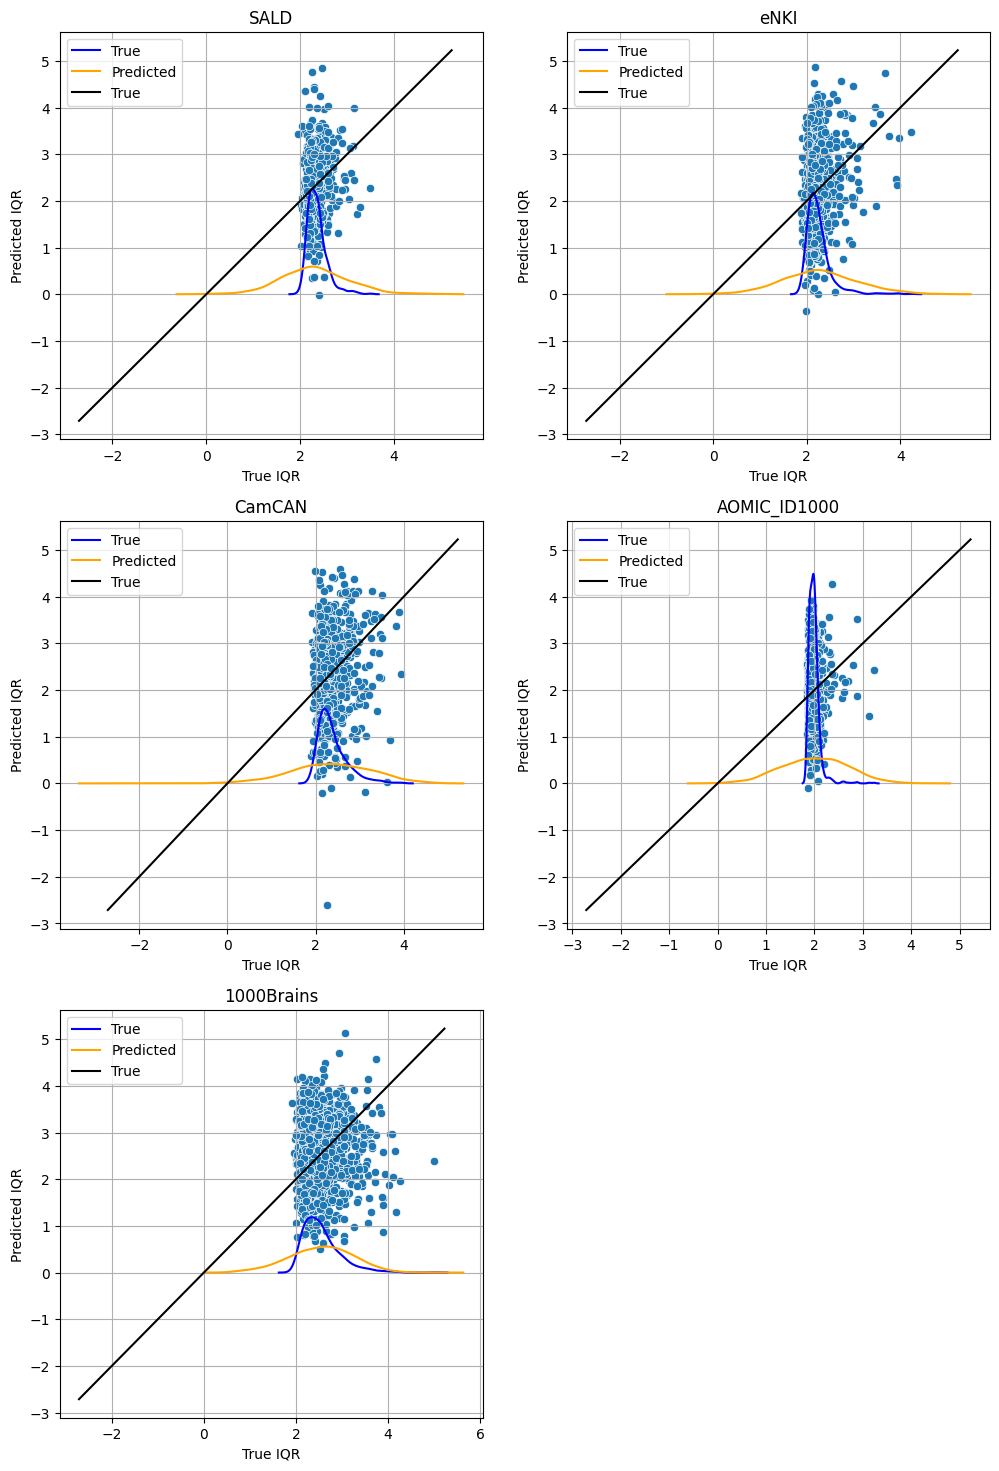

In [45]:
results_loop = pd.read_csv(results_dir / "results_QC_prediction_pooled_data.csv")
# %%
# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(3, 2, figure=fig)

# Iterate over sites and create subplots
for idx, site in enumerate(results_loop["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_loop[results_loop["Site"] == site]

    y_max = results_loop["y_true"].max()
    y_min = results_loop["y_true"].min()
    y_max = max(y_max, results_loop["y_pred"].max()) + 0.1
    y_min = min(y_min, results_loop["y_pred"].min()) - 0.1
    print(y_max, y_min)
    sbn.scatterplot(data=results_2_plot, x="y_true", y="y_pred", ax=ax)
    sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    sbn.kdeplot(
        data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    )
    ax.plot([y_min, y_max], [y_min, y_max], color="black", label="True")

    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    ax.legend()
    ax.set_title(site)
    ax.grid()

# Dummys

(150, 8)

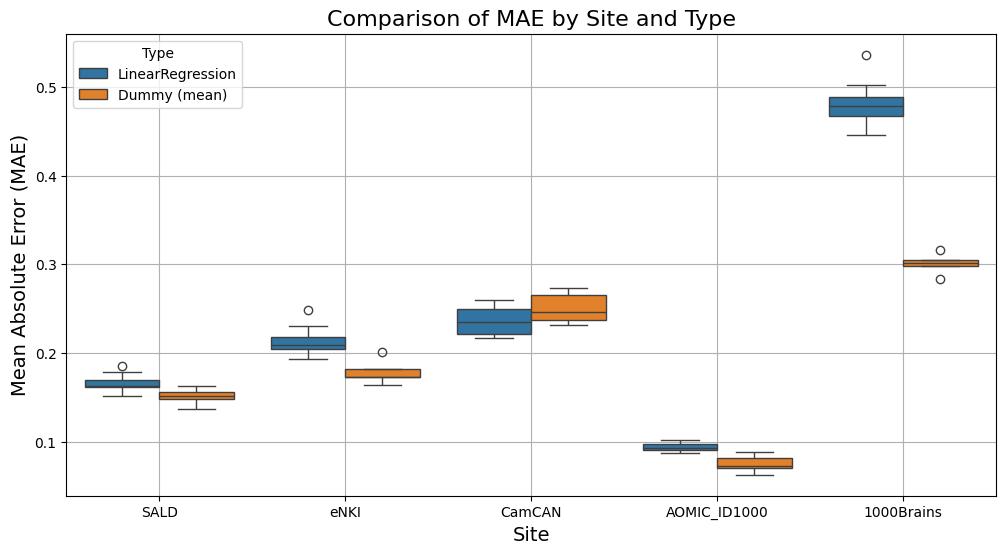

In [12]:
results_dummy = pd.read_csv(results_dir / "results_QC_agregated_single_site_dummy.csv")
results_dummy["Type"] = "Dummy (mean)"
results = pd.read_csv(results_dir / "results_QC_single_site.csv")
results["Type"] = "LinearRegression"
results = pd.concat([results, results_dummy], ignore_index=True)
plt.figure(figsize=(12, 6))
plt.title("Comparison of MAE by Site and Type", fontsize=16)
plt.xlabel("Site", fontsize=14)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
results_2_plot = results[results["Model"] == "QC Test"]
sbn.boxplot(data=results_2_plot, x="Site", y="MAE", hue="Type")

plt.grid()
# %%
results_2_plot.shape


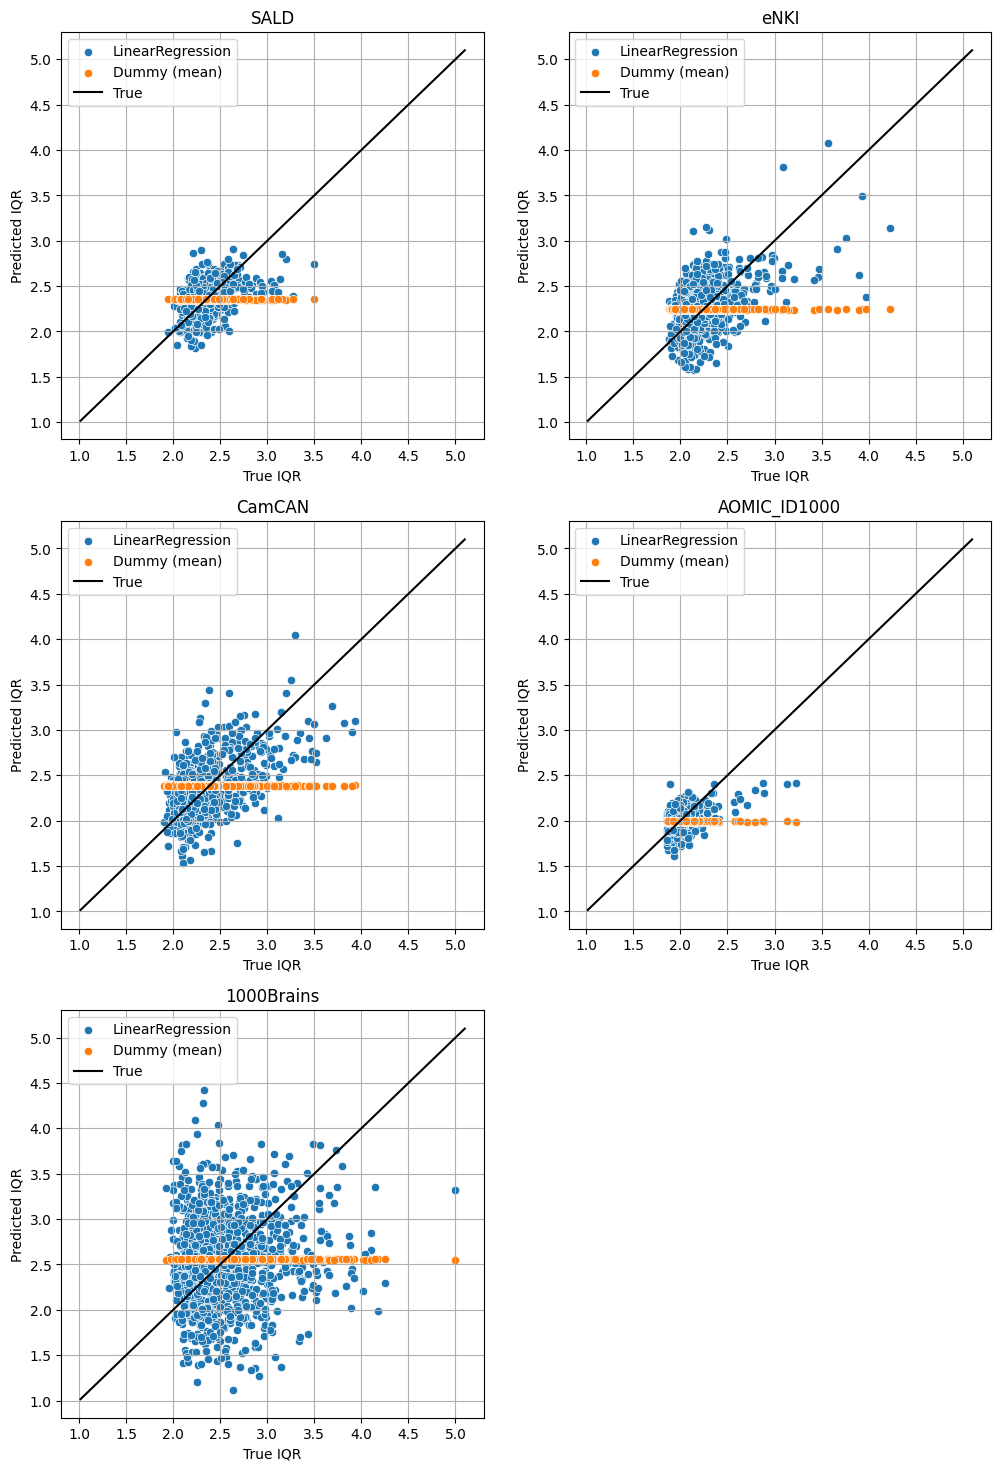

In [ ]:
results_loop_dummy = pd.read_csv(
    results_dir / "results_QC_prediction_single_site_dummy.csv"
)
results_loop_dummy["Type"] = "Dummy (mean)"
results_loop = pd.read_csv(results_dir / "results_QC_prediction_single_site.csv")
results_loop["Type"] = "LinearRegression"
# %%
# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(3, 2, figure=fig)

# Iterate over sites and create subplots
for idx, site in enumerate(results_loop["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_loop[results_loop["Site"] == site]
    results_2_plot_dummy = results_loop_dummy[results_loop_dummy["Site"] == site]

    y_max = results_loop["y_true"].max()
    y_min = results_loop["y_true"].min()
    y_max = max(y_max, results_loop["y_pred"].max()) + 0.1
    y_min = min(y_min, results_loop["y_pred"].min()) - 0.1
    sbn.scatterplot(
        data=results_2_plot, x="y_true", y="y_pred", ax=ax, label="LinearRegression"
    )
    sbn.scatterplot(
        data=results_2_plot_dummy, x="y_true", y="y_pred", ax=ax, label="Dummy (mean)"
    )
    # sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    # sbn.kdeplot(
    #     data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    # )
    ax.plot([y_min, y_max], [y_min, y_max], color="black", label="True")

    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    ax.legend()
    ax.set_title(site)
    ax.grid()

# Permutation score

Text(0.5, 1.0, 'MAE and Permutation MAE by Site')

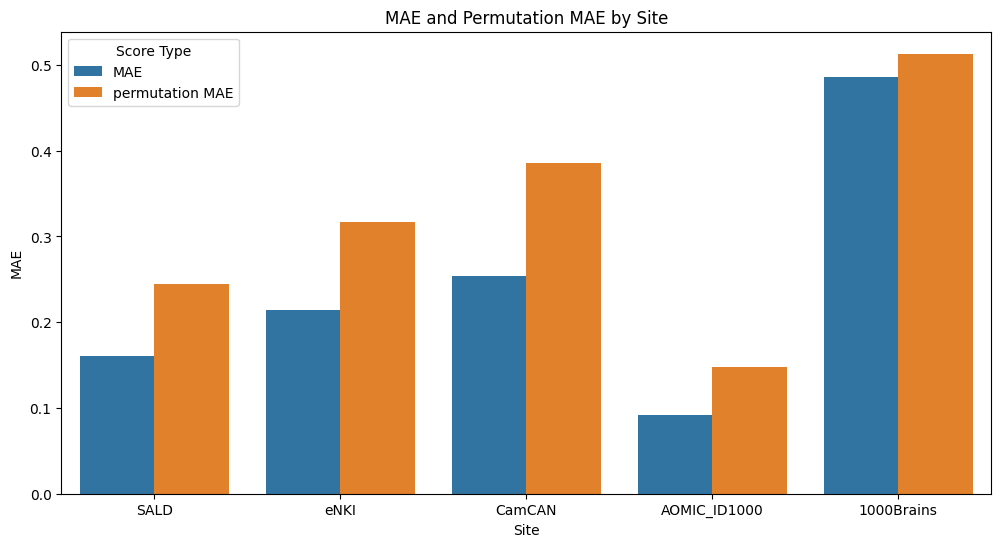

In [4]:
results_loop = pd.read_csv(
    results_dir / "results_QC_prediction_single_site_permutation_test.csv"
)

results_loop["MAE"] = -results_loop["score"]
results_loop["permutation MAE"] = -results_loop["permutation_score"]
# Melt the dataframe to have "score" and "permutation_score" in a single column for easier plotting
results_melted = results_loop.melt(
    id_vars="Site",
    value_vars=["MAE", "permutation MAE"],
    var_name="Score Type",
    value_name="Value",
)


plt.figure(figsize=(12, 6))
# Create a bar plot with "score" and "permutation_score" side by side for each site
sbn.barplot(
    data=results_melted,
    x="Site",
    y="Value",
    hue="Score Type",
    dodge=True,
    errorbar=("ci", 95),
)
plt.xlabel("Site")
plt.ylabel("MAE")
plt.title("MAE and Permutation MAE by Site")
# results_loop = pd.DataFrame(
#     {
#         "score": np.array(score_loop),
#         "permutation_score": np.array(permutation_loop),
#         "pvalue": np.array(pvalue_loop),
#         "Site": np.array(site_loop),
#     }
# )

In [1]:
results_loop

NameError: name 'results_loop' is not defined